In [195]:
#%pip install scipy

In [196]:
# Importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

**Data Ingestion**

In [197]:
# Loading the data
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("abrambeyer/openintro-possum")

print("Path to dataset files:", path)

Note: you may need to restart the kernel to use updated packages.
Path to dataset files: C:\Users\Dell\.cache\kagglehub\datasets\abrambeyer\openintro-possum\versions\1


**Performing Exploratory Data Analysis**

In [198]:
df = pd.read_csv(r"c:\Users\Dell\.cache\kagglehub\datasets\abrambeyer\openintro-possum\versions\1\possum.csv") 

In [199]:
df.head(10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


In [200]:
df.tail(10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
94,95,7,other,m,4.0,91.6,56.6,88.5,37.5,64.5,45.4,14.9,27.0,31.0
95,96,7,other,m,4.0,94.8,55.7,83.0,38.0,66.5,47.7,14.0,25.0,33.0
96,97,7,other,m,3.0,91.0,53.1,86.0,38.0,63.8,46.0,14.5,25.0,31.5
97,98,7,other,m,5.0,93.2,68.6,84.0,35.0,65.6,44.3,14.5,28.5,32.0
98,99,7,other,f,3.0,93.3,56.2,86.5,38.5,64.8,43.8,14.0,28.0,35.0
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [202]:
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [203]:
df.shape

(104, 14)

In [204]:
df.fillna(0, inplace= True)

In [205]:
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [206]:
df.rename(columns={"hdlngth":"head length","skullw":"skull width", "totlngth":"total length","footlgth":"foot length"}, inplace= True)

In [207]:
df

,case,site,Pop,sex,age,head length,skull width,total length,taill,foot length,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [208]:
df.describe(include='all')

,case,site,Pop,sex,age,head length,skull width,total length,taill,foot length,earconch,eye,chest,belly
count,104.000000,104.000000,104,104,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,other,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,58,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52.500000,3.625000,NaN,NaN,3.759615,92.602885,56.883654,87.088462,37.009615,67.800962,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,NaN,NaN,1.963231,3.573349,3.113426,4.310549,1.959518,8.012193,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,NaN,NaN,0.000000,82.500000,50.000000,75.000000,32.000000,0.000000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,NaN,NaN,2.000000,90.675000,54.975000,84.000000,35.875000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,NaN,NaN,3.000000,92.800000,56.350000,88.000000,37.000000,67.950000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,NaN,NaN,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000


**Calculating the measures of center**

In [209]:
# Calculating the measure of center for the head length
head_length_mean = df['head length'].mean()
head_length_median = df['head length'].median()
head_length_mode = df['head length'].mode()

print("Measure of Center for Head Length:")
print(f"Mean: {head_length_mean:.2f}")
print(f"Median: {head_length_median:.2f}")
print(f"Mode: {head_length_mode[0]:.2f}")


Measure of Center for Head Length:
Mean: 92.60
Median: 92.80
Mode: 93.30


In [210]:
# Calculating the measure of centre for Skull width
skull_width_mean = df['skull width'].mean()
skull_width_median = df['skull width'].median()
skull_width_mode = df['skull width'].mode()

print("Measure of Center for Skull Width:")
print(f"Mean: {skull_width_mean:.2f}")
print(f"Median: {skull_width_median:.2f}")
print(f"Mode: {skull_width_mode[0]:.2f}")

Measure of Center for Skull Width:
Mean: 56.88
Median: 56.35
Mode: 57.60


In [211]:
# Calculating the measure of centre for Tail Length
tail_length_mean = df['taill'].mean()
tail_length_median = df['taill'].median()
tail_length_mode = df['taill'].mode()

print("Measure of Center for Tail Length:")
print(f"Mean: {tail_length_mean:.2f}")
print(f"Median: {tail_length_median:.2f}")
print(f"Mode: {tail_length_mode[0]:.2f}")

Measure of Center for Tail Length:
Mean: 37.01
Median: 37.00
Mode: 38.00


In [212]:
# Calculating the measure of centre for Total Length
total_length_mean = df['total length'].mean()
total_length_median = df['total length'].median()
total_length_mode = df['total length'].mode()

print("Measure of Center for Total Length:")
print(f"Mean: {total_length_mean:.2f}")
print(f"Median: {total_length_median:.2f}")
print(f"Mode: {total_length_mode[0]:.2f}")

Measure of Center for Total Length:
Mean: 87.09
Median: 88.00
Mode: 89.00


**Calculating the measures of spread**

In [213]:
# calculating the range for Head Length
min_value = df['head length'].min()
max_value = df['head length'].max()
head_length_range = max_value - min_value
print(f"The range is: {head_length_range:.1f}")


The range is: 20.6


*From the data above, the range of the head length of the possum is 20.6 which is the difference between the maximum value and the minimum value in the dataset*.

In [214]:
# calculating the range for Skull Width
min_value = df['skull width'].min()
max_value = df['skull width'].max()
skull_width_range = max_value - min_value
print(f"The range is : {skull_width_range:.1f}")

The range is : 18.6


*The difference between the maximum value and the minimum value of the width of the skull of a possum as represented on the dataset is 18.6.*

In [215]:
# calculating the range for Tail Length
min_value = df['taill'].min()
max_value = df['taill'].max()
tail_range = max_value - min_value
print(f"The range is : {tail_range:.1f}")

The range is : 11.0


*The range of the tail length of a possum as given in the dataset is 11.0.*

In [216]:
# calculating the range for Total Length
min_value = df['total length'].min()
max_value = df['total length'].max()
total_length_range = max_value - min_value
print(f"The range is : {total_length_range:.2f}")

The range is : 21.50


*For the total length of a possum, the range is 21.50*

In [217]:
# Calculating the measures of spread for Head Length
variance_of_head_length = df['head length'].var()
std_of_head_length = df['head length'].std()
print(f"Variance: {variance_of_head_length:.2f}")
print(f"Standard Deviation: {std_of_head_length:.2f}")

Variance: 12.77
Standard Deviation: 3.57


*The result of the statistical evaluation above shows that variance is 12.77 which indicates the distance of the values from the mean. While the standard deviation shows how close we are to the mean value.*

In [218]:
# Calculating the measures of spread for Skull Width
variance_of_skull_width = df['skull width'].var()
std_of_skull_width = df['skull width'].std()
print(f"Variance: {variance_of_skull_width:.2f}")
print(f"Standard Deviation: {std_of_skull_width:.2f}")

Variance: 9.69
Standard Deviation: 3.11


In [219]:
# Calculating the measures of spread for Tail Length
variance_of_tail_length = df['taill'].var()
std_of_tail_length = df['taill'].std()
print(f"Variance: {variance_of_tail_length:.2f}")
print(f"Standard Deviation: {std_of_tail_length:.2f}")

Variance: 3.84
Standard Deviation: 1.96


In [220]:
# Calculating the measures of spread for Total Length
variance_of_total_length = df['total length'].var()
std_of_total_length = df['total length'].std()
print(f"Variance: {variance_of_total_length:.2f}")
print(f"Standard Deviation: {std_of_total_length:.2f}")

Variance: 18.58
Standard Deviation: 4.31


In [221]:
# Calculating the Quantile values 
data1 = df['head length'].values
q1_head = np.quantile(data1, 0.25)
q2_head = np.quantile(data1, 0.50)
q3_head = np.quantile(data1, 0.75)

print(f"Q1: {q1_head}")
print(f"Q2: {q2_head}")
print(f"Q3: {q3_head}")

Q1: 90.675
Q2: 92.8
Q3: 94.725


In [222]:
# Calculating the Quantile values 
data2 = df['skull width'].values
q1_skull = np.quantile(data2, 0.25)
q2_skull = np.quantile(data2, 0.50)
q3_skull = np.quantile(data2, 0.75)

print(f"Q1: {q1_skull}")
print(f"Q2: {q2_skull:.3f}")
print(f"Q3: {q3_skull}")

Q1: 54.975
Q2: 56.350
Q3: 58.1


In [223]:
# Calculating the Quantile values 
data3 = df['taill'].values
q1_tail = np.quantile(data3, 0.25)
q2_tail = np.quantile(data3, 0.50)
q3_tail = np.quantile(data3, 0.75)

print(f"Q1: {q1_tail}")
print(f"Q2: {q2_tail}")
print(f"Q3: {q3_tail}")

Q1: 35.875
Q2: 37.0
Q3: 38.0


In [224]:
# Calculating the Quantile values 
data4 = df['total length'].values
q1_tot = np.quantile(data4, 0.25)
q2_tot = np.quantile(data4, 0.50)
q3_tot= np.quantile(data4, 0.75)

print(f"Q1: {q1_tot}")
print(f"Q2: {q2_tot}")
print(f"Q3: {q3_tot}")

Q1: 84.0
Q2: 88.0
Q3: 90.0


In [225]:
# Interquantile Range for Head Length
iqr_head = q3_head - q1_head
print(f"IQR: {iqr_head:.2f}")

IQR: 4.05


In [226]:
# Interquantile Range for Skull Width
iqr_skull = q3_skull - q1_skull
print(f"IQR: {iqr_skull:.2f}")

IQR: 3.12


In [227]:
# Interquantile Range for Tail Length
iqr_tail = q3_tail - q1_tail
print(f"IQR: {iqr_tail:.2f}")

IQR: 2.12


In [228]:
# Interquantile Range for Total Length
iqr_tot = q3_tot - q1_tot
print(f"IQR: {iqr_tot:.2f}")

IQR: 6.00


In [229]:
# Calculating the outlier thresholds for Head Length
lower_bound_head = q1_head - (1.5 * iqr_head)
upper_bound_head = q3_head + (1.5 * iqr_head)

print(f"Lower Bound: {lower_bound_head}")
print(f"Upper Bound: {upper_bound_head:.2f}")

Lower Bound: 84.6
Upper Bound: 100.80


In [230]:
# Calculating the outlier thresholds for skull Width
lower_bound_skull = q1_skull - (1.5 * iqr_skull)
upper_bound_skull = q3_skull + (1.5 * iqr_skull)

print(f"Lower Bound: {lower_bound_skull}")
print(f"Upper Bound: {upper_bound_skull:.2f}")

Lower Bound: 50.2875
Upper Bound: 62.79


In [231]:
# Calculating the outlier thresholds for Head Length
lower_bound_tail = q1_tail - (1.5 * iqr_tail)
upper_bound_tail = q3_tail + (1.5 * iqr_tail)

print(f"Lower Bound: {lower_bound_tail}")
print(f"Upper Bound: {upper_bound_tail:.2f}")

Lower Bound: 32.6875
Upper Bound: 41.19


In [232]:
# Calculating the outlier thresholds for Total Length
lower_bound_tot = q1_tot - (1.5 * iqr_tot)
upper_bound_tot = q3_tot + (1.5 * iqr_tot)

print(f"Lower Bound: {lower_bound_tot}")
print(f"Upper Bound: {upper_bound_tot:.2f}")

Lower Bound: 75.0
Upper Bound: 99.00


In [233]:
# Detecting Outliers For Head Length
outliers_head = data1[(data1 < lower_bound_head) | (data1 > upper_bound_head)]
print(f"Outliers: {outliers_head}")

Outliers: [103.1 102.5  82.5]


In [234]:
# Detecting Outliers For Skull Width
outliers_skull = data2[(data2 < lower_bound_skull) | (data2 > upper_bound_skull)]
print(f"Outliers: {outliers_skull}")

Outliers: [67.7 63.2 63.  63.2 64.2 62.8 50.  68.6]


In [235]:
# Detecting Outliers For Tail Length
outliers_tail = data3[(data3 < lower_bound_tail) | (data3 > upper_bound_tail)]
print(f"Outliers: {outliers_tail}")

Outliers: [32.  32.  43.  41.5]


In [236]:
# Detecting Outliers For Total Length
outliers_tot = data4[(data4 < lower_bound_tot) | (data4 > upper_bound_tot)]
print(f"Outliers: {outliers_tot}")

Outliers: []


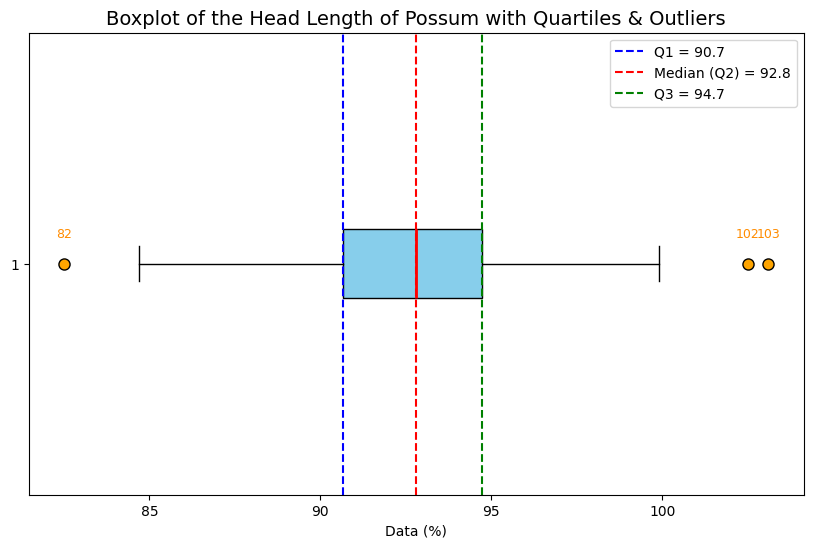

Q1 (25th percentile): 90.67
Q2 (Median, 50th percentile): 92.80
Q3 (75th percentile): 94.72
IQR (Q3 - Q1): 4.05
Lower Bound for Outliers: 84.60
Upper Bound for Outliers: 100.80
Outliers Detected: [np.float64(103.1), np.float64(102.5), np.float64(82.5)]


In [237]:
plt.figure(figsize=(10, 6))
box = plt.boxplot(data1, vert=False, patch_artist=True,
                  boxprops=dict(facecolor="skyblue", color="black"),
                  medianprops=dict(color="red", linewidth=2),
                  whiskerprops=dict(color="black"),
                  capprops=dict(color="black"),
                  flierprops=dict(markerfacecolor="orange", marker='o', markersize=8, linestyle="none"))

# Annotate Quartiles
plt.axvline(q1_head, color="blue", linestyle="--", label=f"Q1 = {q1_head:.1f}")
plt.axvline(q2_head, color="red", linestyle="--", label=f"Median (Q2) = {q2_head:.1f}")
plt.axvline(q3_head, color="green", linestyle="--", label=f"Q3 = {q3_head:.1f}")

# Annotate outliers if present
for outlier in outliers_head:
    plt.text(outlier, 1.05, f"{outlier:.0f}", ha="center", va="bottom", color="darkorange", fontsize=9)

# Titles and labels
plt.title("Boxplot of the Head Length of Possum with Quartiles & Outliers", fontsize=14)
plt.xlabel("Data (%)")
plt.legend()

plt.show()

# Print results
print(f"Q1 (25th percentile): {q1_head:.2f}")
print(f"Q2 (Median, 50th percentile): {q2_head:.2f}")
print(f"Q3 (75th percentile): {q3_head:.2f}")
print(f"IQR (Q3 - Q1): {iqr_head:.2f}")
print(f"Lower Bound for Outliers: {lower_bound_head:.2f}")
print(f"Upper Bound for Outliers: {upper_bound_head:.2f}")
print(f"Outliers Detected: {list(outliers_head)}")


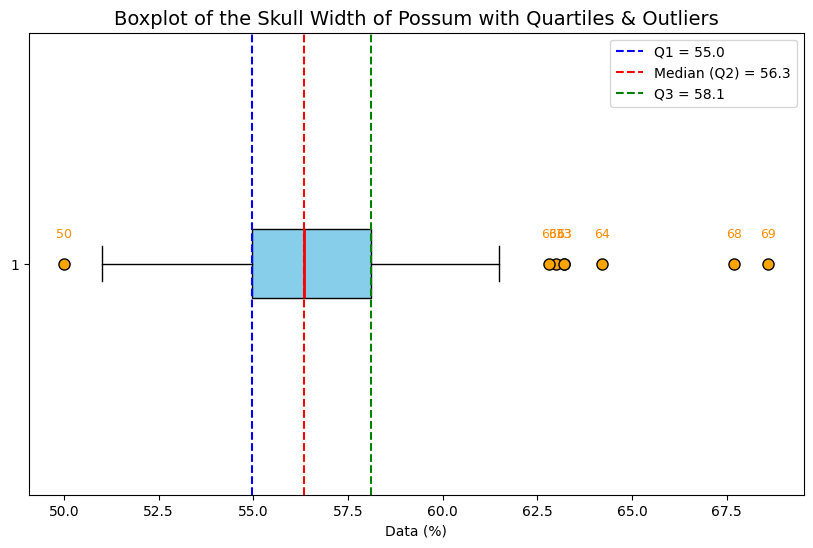

Q1 (25th percentile): 54.98
Q2 (Median, 50th percentile): 56.35
Q3 (75th percentile): 58.10
IQR (Q3 - Q1): 3.12
Lower Bound for Outliers: 50.29
Upper Bound for Outliers: 62.79
Outliers Detected: [np.float64(67.7), np.float64(63.2), np.float64(63.0), np.float64(63.2), np.float64(64.2), np.float64(62.8), np.float64(50.0), np.float64(68.6)]


In [238]:
plt.figure(figsize=(10, 6))
box = plt.boxplot(data2, vert=False, patch_artist=True,
                  boxprops=dict(facecolor="skyblue", color="black"),
                  medianprops=dict(color="red", linewidth=2),
                  whiskerprops=dict(color="black"),
                  capprops=dict(color="black"),
                  flierprops=dict(markerfacecolor="orange", marker='o', markersize=8, linestyle="none"))

# Annotate Quantiles
plt.axvline(q1_skull, color="blue", linestyle="--", label=f"Q1 = {q1_skull:.1f}")
plt.axvline(q2_skull, color="red", linestyle="--", label=f"Median (Q2) = {q2_skull:.1f}")
plt.axvline(q3_skull, color="green", linestyle="--", label=f"Q3 = {q3_skull:.1f}")

# Annotate outliers if present
for outlier in outliers_skull:
    plt.text(outlier, 1.05, f"{outlier:.0f}", ha="center", va="bottom", color="darkorange", fontsize=9)

# Titles and labels
plt.title("Boxplot of the Skull Width of Possum with Quartiles & Outliers", fontsize=14)
plt.xlabel("Data (%)")
plt.legend()

plt.show()

# Print results
print(f"Q1 (25th percentile): {q1_skull:.2f}")
print(f"Q2 (Median, 50th percentile): {q2_skull:.2f}")
print(f"Q3 (75th percentile): {q3_skull:.2f}")
print(f"IQR (Q3 - Q1): {iqr_skull:.2f}")
print(f"Lower Bound for Outliers: {lower_bound_skull:.2f}")
print(f"Upper Bound for Outliers: {upper_bound_skull:.2f}")
print(f"Outliers Detected: {list(outliers_skull)}")


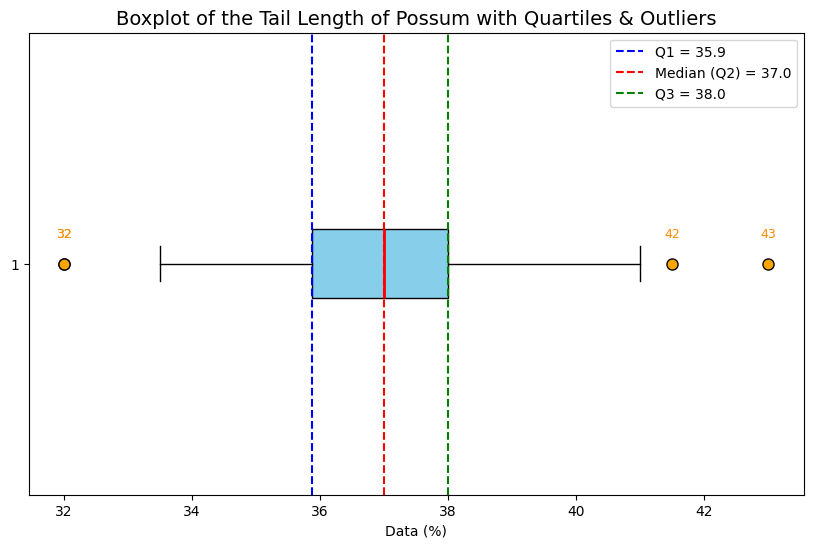

Q1 (25th percentile): 35.88
Q2 (Median, 50th percentile): 37.00
Q3 (75th percentile): 38.00
IQR (Q3 - Q1): 2.12
Lower Bound for Outliers: 32.69
Upper Bound for Outliers: 41.19
Outliers Detected: [np.float64(32.0), np.float64(32.0), np.float64(43.0), np.float64(41.5)]


In [239]:
plt.figure(figsize=(10, 6))
box = plt.boxplot(data3, vert=False, patch_artist=True,
                  boxprops=dict(facecolor="skyblue", color="black"),
                  medianprops=dict(color="red", linewidth=2),
                  whiskerprops=dict(color="black"),
                  capprops=dict(color="black"),
                  flierprops=dict(markerfacecolor="orange", marker='o', markersize=8, linestyle="none"))

# Annotate Quantiles
plt.axvline(q1_tail, color="blue", linestyle="--", label=f"Q1 = {q1_tail:.1f}")
plt.axvline(q2_tail, color="red", linestyle="--", label=f"Median (Q2) = {q2_tail:.1f}")
plt.axvline(q3_tail, color="green", linestyle="--", label=f"Q3 = {q3_tail:.1f}")

# Annotate outliers if present
for outlier in outliers_tail:
    plt.text(outlier, 1.05, f"{outlier:.0f}", ha="center", va="bottom", color="darkorange", fontsize=9)

# Titles and labels
plt.title("Boxplot of the Tail Length of Possum with Quartiles & Outliers", fontsize=14)
plt.xlabel("Data (%)")
plt.legend()

plt.show()

# Print results
print(f"Q1 (25th percentile): {q1_tail:.2f}")
print(f"Q2 (Median, 50th percentile): {q2_tail:.2f}")
print(f"Q3 (75th percentile): {q3_tail:.2f}")
print(f"IQR (Q3 - Q1): {iqr_tail:.2f}")
print(f"Lower Bound for Outliers: {lower_bound_tail:.2f}")
print(f"Upper Bound for Outliers: {upper_bound_tail:.2f}")
print(f"Outliers Detected: {list(outliers_tail)}")


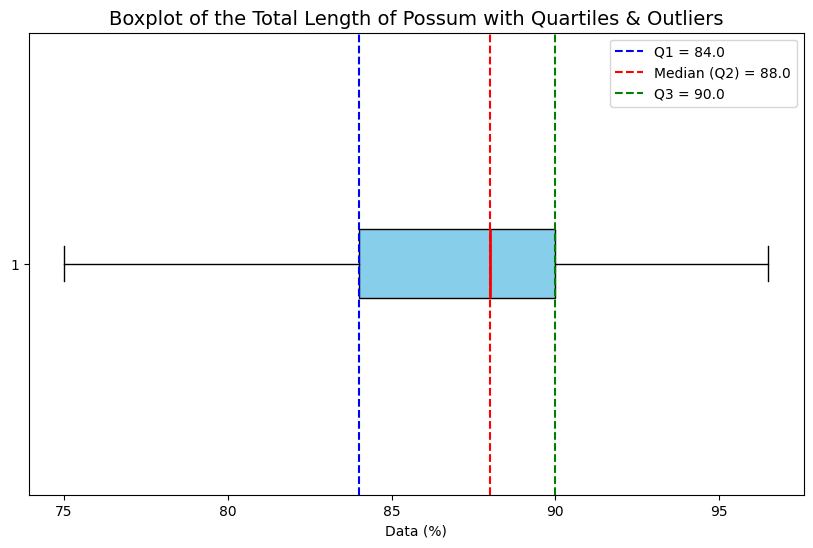

Q1 (25th percentile): 84.00
Q2 (Median, 50th percentile): 88.00
Q3 (75th percentile): 90.00
IQR (Q3 - Q1): 6.00
Lower Bound for Outliers: 75.00
Upper Bound for Outliers: 99.00
Outliers Detected: []


In [240]:
plt.figure(figsize=(10, 6))
box = plt.boxplot(data4, vert=False, patch_artist=True,
                  boxprops=dict(facecolor="skyblue", color="black"),
                  medianprops=dict(color="red", linewidth=2),
                  whiskerprops=dict(color="black"),
                  capprops=dict(color="black"),
                  flierprops=dict(markerfacecolor="orange", marker='o', markersize=8, linestyle="none"))

# Annotate Quartiles
plt.axvline(q1_tot, color="blue", linestyle="--", label=f"Q1 = {q1_tot:.1f}")
plt.axvline(q2_tot, color="red", linestyle="--", label=f"Median (Q2) = {q2_tot:.1f}")
plt.axvline(q3_tot, color="green", linestyle="--", label=f"Q3 = {q3_tot:.1f}")

# Annotate outliers if present
for outlier in outliers_tot:
    plt.text(outlier, 1.05, f"{outlier:.0f}", ha="center", va="bottom", color="darkorange", fontsize=9)

# Titles and labels
plt.title("Boxplot of the Total Length of Possum with Quartiles & Outliers", fontsize=14)
plt.xlabel("Data (%)")
plt.legend()

plt.show()

# Print results
print(f"Q1 (25th percentile): {q1_tot:.2f}")
print(f"Q2 (Median, 50th percentile): {q2_tot:.2f}")
print(f"Q3 (75th percentile): {q3_tot:.2f}")
print(f"IQR (Q3 - Q1): {iqr_tot:.2f}")
print(f"Lower Bound for Outliers: {lower_bound_tot:.2f}")
print(f"Upper Bound for Outliers: {upper_bound_tot:.2f}")
print(f"Outliers Detected: {list(outliers_tot)}")


In [241]:
# Skewness of the Head Length 
skewness_1 = df['head length'].skew()
print(f"Skewness: {skewness_1:.3f}")


Skewness: -0.056


The result of the skewness of the headlength shows that it is negatively skewed(the tail is to the left).This means that most of the length is above the mean. 

In [242]:
# Skewness of the Skull Width
skewness_2 = df['skull width'].skew()
print(f"Skewness: {skewness_2:.3f}")


Skewness: 1.008


The result of the skewness of the skull width shows that it is positively skewed(the tail is to the right).This means that most of the width is below the mean. 

In [243]:
# Skewness of the Tail Length 
skewness_3 = df['taill'].skew()
print(f"Skewness: {skewness_3:.3f}")


Skewness: 0.168


The result of the skewness of the tailength shows that it is evenly distributed.

In [244]:
# Skewness of the Total Length 
skewness_4 = df['total length'].skew()
print(f"Skewness: {skewness_4:.3f}")


Skewness: -0.285


The result of the skewness of the total length shows that it is negatively skewed(the tail is to the left).This means that most of the length is above the mean. 

In [245]:
# Kurtosis of the Head Length
kurtosis = df['head length'].kurt()
print(f"Kurtosis: {kurtosis:.3f}")


Kurtosis: 0.891


In [246]:
# Kurtosis of the Skull Width
kurtosis_1 = df['skull width'].kurt()
print(f"Kurtosis: {kurtosis_1:.3f}")


Kurtosis: 2.476


In [247]:
# Kurtosis of the Tail Length
kurtosis_2 = df['taill'].kurt()
print(f"Kurtosis: {kurtosis_2:.3f}")


Kurtosis: 0.397


In [248]:
# Kurtosis of the Total Length
kurtosis_3 = df['total length'].kurt()
print(f"Kurtosis: {kurtosis_3:.3f}")


Kurtosis: -0.105


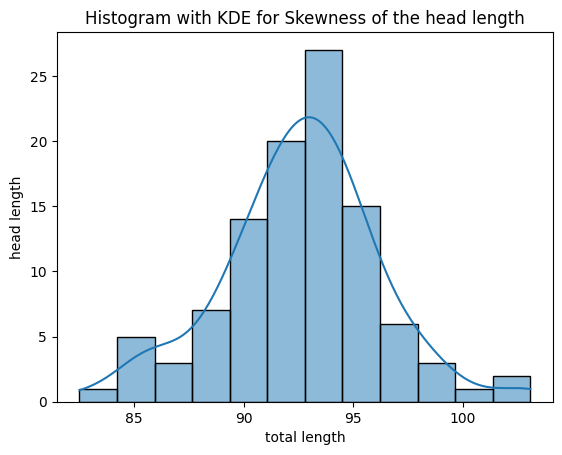

In [249]:
sns.histplot(data1, kde=True)
plt.title('Histogram with KDE for Skewness of the head length')
plt.xlabel('total length')
plt.ylabel('head length')
plt.show()

From the histogram above, the headlength and the total length of a possum was compared and we can see that the head length is negatively skewed while the total length is evenly distributed, hence the shape of the graph.
